# How to Think Probabilistically with Discrete Distributions
## Master Hacker Statistics With Numpy
<img src='images/bruno.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@brunogobofoto?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Bruno Bueno</a>
        on 
        <a href='https://www.pexels.com/photo/man-in-vr-with-game-riffle-playing-video-game-3854821/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Setup

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Cdf

%config InlineBackend.figure_format = 'retina'

### Probabilistic Thinking

Say, you are looking at the average weight of 100 Olympic athletes. Based on this data alone, can you make valid assumptions about the mean weight of all Olympic athletes? You would probably say "I would need more data". And you would be correct. In real life, you can never have enough data that fully represents the group you are interested in. You always work with a sample. 

However, if you have a small sample it is not the end of the world and does not mean you have to give up. It also doesn't mean you go ahead and collect more data because data collection is expensive and time-consuming.

As a solution, there is an entire field of statistics called **inference**. Statistical inference is powered by probability theory and allows data scientists to make predictions for the whole population by just working with a small sample.

For example, let's say the mean of weight of our 100 Olympic athletes is around 72:

In [16]:
athletes = pd.read_csv('data/athlete_events.csv')
subset = athletes.sample(100)

In [17]:
subset_cdf = Cdf.from_seq(subset['Weight'])

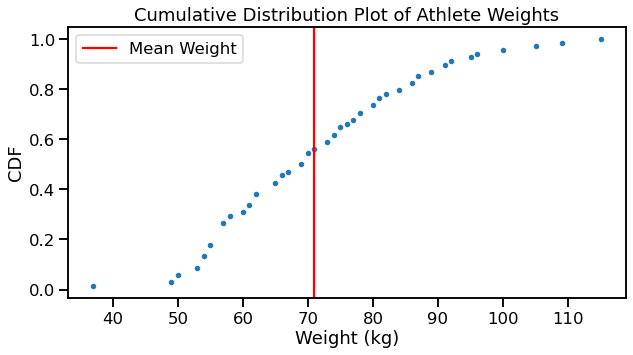

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(subset_cdf, marker='.', linestyle='none')

ax.set(title='Cumulative Distribution Plot of Athlete Weights',
       xlabel='Weight (kg)', 
       ylabel='CDF')
ax.axvline(x=subset['Weight'].mean(), color='r', label='Mean Weight')
plt.legend()
plt.show();

There have been more than 200 thousand athletes in Olympic games since 1896, so we cannot make a well-informed guess about the mean weight of the population (in this case, all Olympic athletes). What if you collected another 100 athletes' information and plotted the weight:

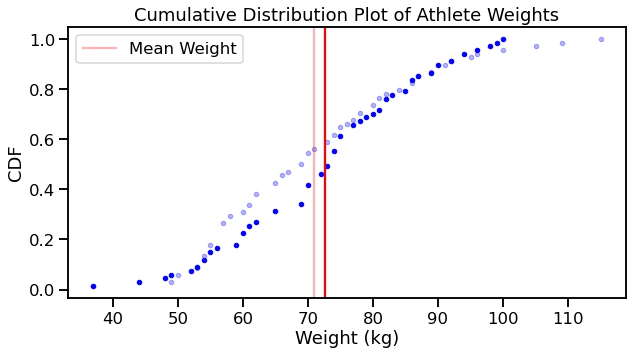

In [31]:
subset2 = athletes.sample(100)

subset_cdf2 = Cdf.from_seq(subset2['Weight'])

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(subset_cdf, marker='.', linestyle='none', alpha=0.3, color='b')
ax.axvline(x=subset['Weight'].mean(),
           color='r',
           label='Mean Weight',
           alpha=0.3)

ax.plot(subset_cdf2, marker='.', linestyle='none', color='b')
ax.axvline(x=subset2['Weight'].mean(), color='r')

ax.set(title='Cumulative Distribution Plot of Athlete Weights',
       xlabel='Weight (kg)',
       ylabel='CDF')

plt.legend()
plt.show()

We get a similar set of data and a similar mean. Are you ready to tell the mean weight for the whole athletes yet? No matter how many times we collect more data which gets more and more difficult every time, we will never have enough. But using Python's magical statistics tools, we can simulate the data acquisition as many times as we want.

Let's simulate the weight data of Olympic athletes 100 times and plot the results:

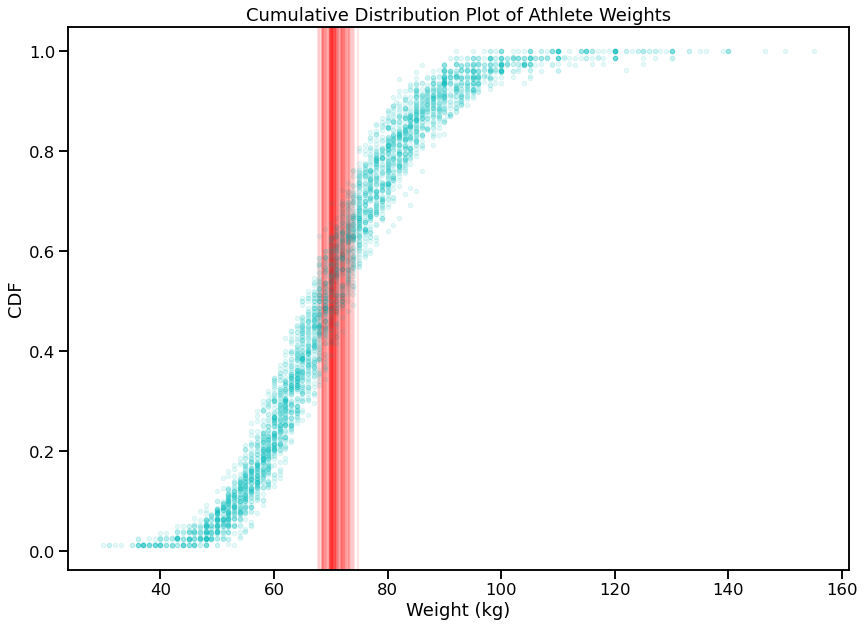

In [39]:
fig, ax = plt.subplots(figsize=(14,10))
for _ in range(100):
    subset = athletes.sample(100)
    
    subset_cdf = Cdf.from_seq(subset['Weight'])
    
    ax.plot(subset_cdf, marker='.', linestyle='none', color='c', alpha=0.1)
    
    ax.axvline(subset['Weight'].mean(), alpha=0.1, color='r')

ax.axvline(subset['Weight'].mean(), alpha=0.05, label='Mean Weight')
ax.set(title='Cumulative Distribution Plot of Athlete Weights',
       xlabel='Weight (kg)', ylabel='CDF')

plt.show();

Using simulation, we can now confidently say the mean weight of all Olympic athletes is *probably* around 71 or 72.

Probabilistic thinking is at the heart of statistical inference and in today's story, we will learn about discrete probability distributions that are used to model real-life scenarios.

### Basic Probability Refresher

Before we move on to the distributions, we will talk about the basics of probability.

Probability describes the likelihood of something happening. The founders of statistics studied probability around the games of chance. So, just like many, we will start with a basic example of coin flips.

If you flip a coin, there can only be two outcomes: the coin comes up as heads or it comes up as tails. Since both sides of the coin are equally weighted (a fair coin), we can say that the probabilities of a coin coming up heads and tails are 50% or 0.5. 

In scientific notation, probability of something happening is notated as follows:

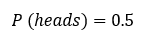
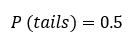

And it reads 'Probability of a coin coming up as heads (or tails) is 0.5'. Another example:

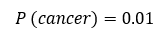

Probability of having cancer is 1%.

There are some other terms regarding probability which often comes up in other contexts:
- **Experiment**: an activity with an observable result
- **Trials**: repetition of an experiment
- **Outcomes**: results of each trial
- **Sample space**: set of all possible outcomes
- **Event**: a subset of sample space

For example, rolling a die is the **experiment**. Rolling several dice is considered as **trials** of the same experiment. Possible **outcome** of rolling a die can be 1 or 2 etc. The set of all possible outcomes, in this case 1, 2, 3, 4, 5, 6 is called a **sample space**. An event can be thought of any result of the experiment, for example rolling a 6. 

There is also a term called *complimentary event*. For instance, if the coin comes up as heads, the complimentary event is tails. If we roll a 5 with a die, complimentary events can be the other 5 numbers. 

The probability of the complimentary event is found by subtracting the probability of the given outcome from 1:

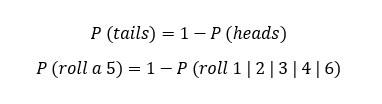

Probability of rolling a 5 is 1/6 by definition but it can also be found by subtracting the sum of probabilities of all other numbers from 1.

### Bernoulli Trials

### Binomial Distribution

### Poisson Distribution